# Régression Linéaire Simple:  f(x) = ax + b

Les bibiothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

1 - Récupération des données

In [2]:
#1-Récupération des données

reg_simple=pd.read_csv("reg_simple.csv")
reg_simple

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21
5,7,25
6,8,30
7,9,21
8,10,32
9,11,34


2 - Visualisation des données / Création d'un Dataset Linéaire (x,y)

shape de x:  (27, 1)
--------------------------------------------------------------
shape de y:  (27, 1)
--------------------------------------------------------------


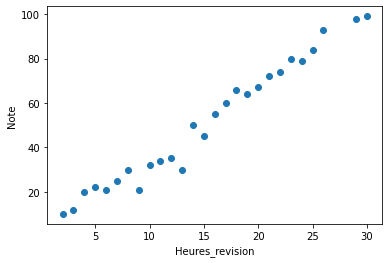

In [3]:
#2-Visualisation des données

dataframe= pd.DataFrame(reg_simple)

x = np.array(dataframe['heure_rev']) # Variable explicative
x = x.reshape((len(x),1))

y = np.array(dataframe['note'])
y = y.reshape((len(y),1))

print("shape de x: ", x.shape)
print('--------------------------------------------------------------')
print("shape de y: ", y.shape)
print('--------------------------------------------------------------')


plt.scatter(x,y)
plt.xlabel('Heures_revision')
plt.ylabel('Note')

plt.show() 

3 - Création du modèle (model(X,theta))

In [4]:
#3-Création du modèle (model(X,theta))

#hstack va aligner les 2 listes sous forme de matrice
# exemple liste 'x' et 'y': indice '0' de chaques listes se retrouvera sur la même ligne etc

# y = ax + b -> besoin d'une colonne de 1 pour le b qui n'a pas de feature 
#et aussi pour la shape de la matrice pour pouvoir les multiplier entres-elles
X = np.hstack((x, np.ones(x.shape))) 
print("shape X: ",X.shape)
print("Matrice de X : \n", X)


print("--------------------------------------------------------------------------------------------------------")

#Création du theta aléatoire 2 lignes/1 colonne en lien avec le nb de paramètres (ici a et b donc 2 paramètres)
theta = np.random.randn(2,1)
print("shape theta: ",theta.shape)
print(" Matrice de theta:")
print(theta)

shape X:  (27, 2)
Matrice de X : 
 [[ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]
 [11.  1.]
 [12.  1.]
 [13.  1.]
 [14.  1.]
 [15.  1.]
 [16.  1.]
 [17.  1.]
 [18.  1.]
 [19.  1.]
 [20.  1.]
 [21.  1.]
 [22.  1.]
 [23.  1.]
 [24.  1.]
 [25.  1.]
 [26.  1.]
 [29.  1.]
 [30.  1.]]
--------------------------------------------------------------------------------------------------------
shape theta:  (2, 1)
 Matrice de theta:
[[ 0.23379339]
 [-1.54796637]]


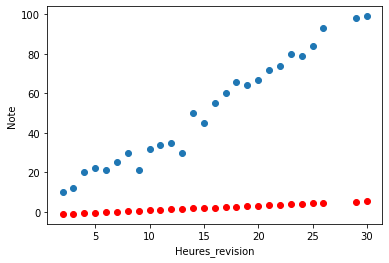

In [5]:
#Fonction du modèle : f(x) = X.theta
def modele(X, theta):
    return X.dot(theta)

modele(X, theta)

plt.scatter(x[:,0],y)
plt.scatter(x[:,0],modele(X,theta), c='r')

plt.xlabel('Heures_revision')
plt.ylabel('Note')


plt.show() 

4-Fonction coût

In [6]:
#Fonction Coût :
def fonction_cout(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((modele(X, theta) - y)**2)

fonction_cout(X,y,theta)

1524.518520215758

5-Gradient

In [7]:
#Fonction Gradient :
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(modele(X, theta) - y)

gradient(X,y,theta)

array([[-943.76166525],
       [ -49.04346655]])

6-Descente du gradient

In [8]:
#Fonction Descente de Gradient : alpha == learning_rate
def descente_gradient(X, y, theta, learning_rate, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    cost_history = np.zeros(n_iterations) 
     
    for i in range(0, n_iterations):
        # mise a jour du parametre theta (formule du gradient descent)
        theta = theta - learning_rate * gradient(X, y, theta)
        # on enregistre la valeur du Cout au tour i dans cost_history[i]
        cost_history[i] = fonction_cout(X, y, theta) 
         
    return theta, cost_history

In [9]:
learning_rate = 0.0001
n_iterations = 1000

print(descente_gradient(X,y,theta,learning_rate,n_iterations))

(array([[ 3.43219943],
       [-1.34365289]]), array([1436.52621274, 1353.64702883, 1275.58385117, 1202.0568276 ,
       1132.80236777, 1067.57219829, 1006.1324726 ,  948.26293269,
        893.75611947,  842.41662903,  794.06041215,  748.51411449,
        705.6144551 ,  665.2076411 ,  627.14881632,  591.30154199,
        557.53730765,  525.73507041,  495.78082105,  467.56717526,
        440.99298871,  415.96299446,  392.38746138,  370.18187255,
        349.26662218,  329.56673029,  311.01157392,  293.53463388,
        277.07325635,  261.56842825,  246.96456568,  233.20931463,
        220.25336334,  208.05026548,  196.55627367,  185.73018264,
        175.53318148,  165.92871456,  156.88235046,  148.3616585 ,
        140.33609252,  132.77688137,  125.65692573,  118.95070102,
        112.63416583,  106.6846758 ,  101.08090238,   95.8027564 ,
         90.83131605,   86.14875906,   81.73829876,   77.58412395,
         73.67134219,   69.98592644,   66.51466473,   63.24511284,
         60.165

Entrainement du modèle

theta final:  [[ 3.43219943]
 [-1.34365289]]
x (27, 1)
y (27, 1)
X (27, 2)


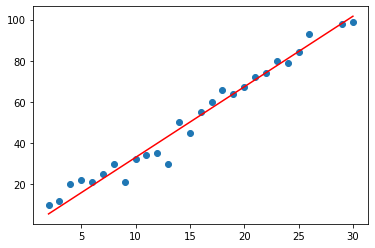

In [10]:
learning_rate = 0.0001
n_iterations = 1000
 
theta_final, cost_history = descente_gradient(X, y, theta, learning_rate, n_iterations)
 
print("theta final: ",theta_final) #parametres du modele une fois que la machine a été entrainée
 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = modele(X, theta_final)
#print("predictions : ", predictions)
print("x",x.shape)
print("y",y.shape)
print("X",X.shape)
 
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()

7-Evaluer le modèle 

méthode 1: Pearson

In [11]:
# test de corrélation de Pearson
from scipy.stats import pearsonr

test=pd.DataFrame(pearsonr(dataframe['note'], dataframe['heure_rev']),
                index = ['Pearson_coef', 'p_value'],
                columns = ['Resultat'])

print(test)
print('-----------------------------------')
mask=test['Resultat']>0.5
filtre_test=test[mask]
print('test filtré : \n',filtre_test)
print('-----------------------------------')
calcul=filtre_test**2
print("Calcul de R² : \n", calcul)
print("Soit R² = 97%")

                  Resultat
Pearson_coef  9.865700e-01
p_value       3.398679e-21
-----------------------------------
test filtré : 
               Resultat
Pearson_coef   0.98657
-----------------------------------
Calcul de R² : 
               Resultat
Pearson_coef   0.97332
Soit R² = 97%


méthode 2: Coefficient de Détermination

In [12]:
def coef_determination(y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(y, predictions)

0.9723855254332235

8-Fonction coût : Erreur Quadratique moyenne

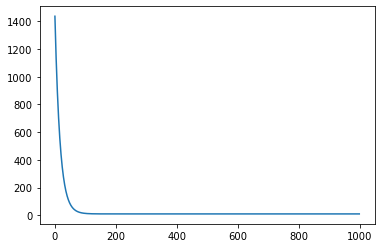

In [13]:
plt.plot(range(n_iterations), cost_history)
plt.show()

# Régression Linéaire multiples

In [14]:
#1-Récupération des données

boston=pd.read_csv("boston_house_prices.csv")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
#2-Visualisation des données

dataframe02= pd.DataFrame(boston)
dataframe02.isnull() #Vérification si présence de valeurs nulles (False si valeur ok // True si pas de valeur)

#Détails des != variables: 
#https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
#Méthode 1:connaissance des coefficients de corrélation linéaire simple de toutes les paires de variables entre elles, 
#de la moyenne arithmétique et des écarts-types de toutes les variables. 


#Méthode 2: calculs matriciels. 
#En utilisant la méthode matricielle :
#    Implémentez un modèle de régression multiple sur la base de données issue du fichier boston_house_prices.csv
#    Évaluez les résultats obtenus en utilisant la fonction mean_squared_error de sklearn

In [17]:
#Recherche de la corrélation dans la colonne MEDV avec valeur absolue car 1 et -1 sont corrélées
dataframe02.corrwith(dataframe02['MEDV'], method='pearson').abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

<AxesSubplot:>

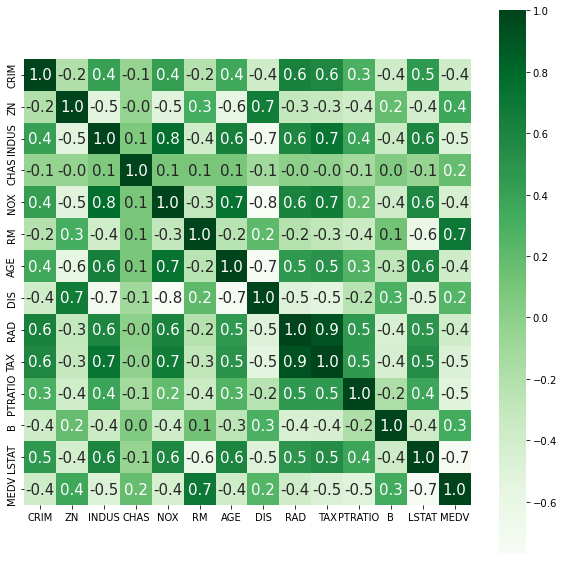

In [18]:
import seaborn as sns
correlation=dataframe02.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [19]:
selection_col=dataframe02.iloc[: , [5,12]] #Selection de la colonne 5: 'RM' et 12: 'LSTA'

x = np.array(selection_col) # Variables explicatives

y = np.array(dataframe02['MEDV'])
y = y.reshape((len(y),1))

print("shape de x: ", x.shape)
print('--------------------------------------------------------------')
print("shape de y: ", y.shape)
print('--------------------------------------------------------------')

shape de x:  (506, 2)
--------------------------------------------------------------
shape de y:  (506, 1)
--------------------------------------------------------------


In [20]:
#3-Création du modèle (model(X,theta))

#hstack va aligner les 2 listes sous forme de matrice
# exemple liste 'x' et 'y': indice '0' de chaques listes se retrouvera sur la même ligne etc
test59000=np.ones((506,1))
X = np.hstack((x, test59000))
#X = np.hstack((x, np.ones(x.shape)))
print("shape X: ",X.shape)
print("Matrice de X colonne 2:", X[:1])
#print("test:\n",X[:1])

print("--------------------------------------------------------------------------------------------------------")

#Création du theta aléatoire 3 lignes/1 colonne
theta = np.random.randn(3,1)
print("shape theta: ",theta.shape)
print(" Matrice de theta:")
print(theta)

shape X:  (506, 3)
Matrice de X colonne 2: [[6.575 4.98  1.   ]]
--------------------------------------------------------------------------------------------------------
shape theta:  (3, 1)
 Matrice de theta:
[[-0.6230297 ]
 [-0.38428425]
 [-0.3154074 ]]


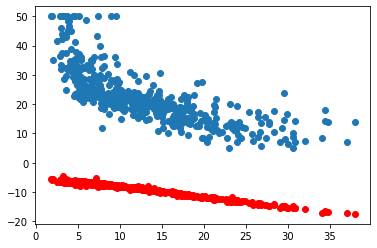

In [21]:
modele(X,theta)

plt.scatter(x[:,1],y)
plt.scatter(x[:,1],modele(X,theta), c='r')


plt.show() 

In [22]:
fonction_cout(X,y,theta)
gradient(X,y,theta)

learning_rate = 0.0001
n_iterations = 1000
descente_gradient(X,y,theta,learning_rate,n_iterations)

(array([[ 3.22755118],
        [-0.02759808],
        [ 0.21989381]]),
 array([512.01165054, 495.20233156, 479.17848018, 463.90272451,
        449.33947231, 435.45482618, 422.2165029 , 409.5937565 ,
        397.55730515, 386.07926133, 375.13306551, 364.69342286,
        354.73624307, 345.23858294, 336.17859181, 327.53545945,
        319.28936663, 311.4214378 , 303.91369625, 296.74902126,
        289.91110735, 283.38442544, 277.15418592, 271.20630338,
        265.52736311, 260.10458917, 254.92581392, 249.97944913,
        245.25445831, 240.74033048, 236.42705515, 232.30509847,
        228.3653805 , 224.59925367, 220.99848213, 217.55522217,
        214.26200353, 211.11171162, 208.0975706 , 205.21312723,
        202.45223552, 199.80904208, 197.2779722 , 194.85371659,
        192.53121871, 190.30566277, 188.17246223, 186.12724891,
        184.16586258, 182.28434106, 180.47891079, 178.74597783,
        177.08211935, 175.48407542, 173.94874132, 172.4731601 ,
        171.05451556, 169.6901255

[[ 4.84748706]
 [-0.65988594]
 [ 0.42814632]]
x (506, 2)
y (506, 1)
X (506, 3)


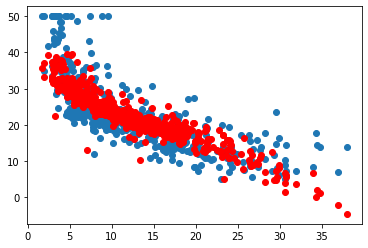

In [23]:
learning_rate = 0.001
n_iterations = 1000
 
theta_final, cost_history = descente_gradient(X, y, theta, learning_rate, n_iterations)
 
print(theta_final) #parametres du modele une fois que la machine a été entrainée
 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = modele(X, theta_final)

print("x",x.shape)
print("y",y.shape)
print("X",X.shape)
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x[ :, 1], y)
plt.scatter(x[ :, 1], predictions, c='r')
plt.show()

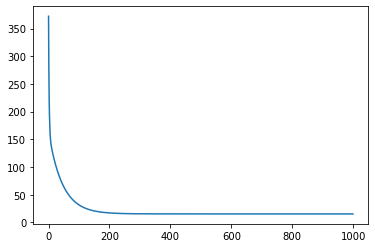

In [24]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [25]:
coef_determination(y, predictions)

0.6383338078448342

In [26]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
erreur = mean_squared_error(X[:,0], y)
print(erreur)

339.946211555336


# Régression Polynomiale

In [27]:
#1-Récupération des données

salaires=pd.read_csv("Position_Salaries.csv")
salaires

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Gouverneur,6,150000
6,Associate,7,200000
7,Commercial,8,300000
8,C-level,9,500000
9,PDG,10,1000000


In [28]:
#2-Visualisation des données

dataframe03= pd.DataFrame(salaires)

[[  1.   1.   1.]
 [  4.   2.   1.]
 [  9.   3.   1.]
 [ 16.   4.   1.]
 [ 25.   5.   1.]
 [ 36.   6.   1.]
 [ 49.   7.   1.]
 [ 64.   8.   1.]
 [ 81.   9.   1.]
 [100.  10.   1.]]
shape de x:  (10, 1)
--------------------------------------------------------------
shape de X:  (10, 3)
--------------------------------------------------------------
shape de y:  (10, 1)
--------------------------------------------------------------


Text(0, 0.5, 'Salaire')

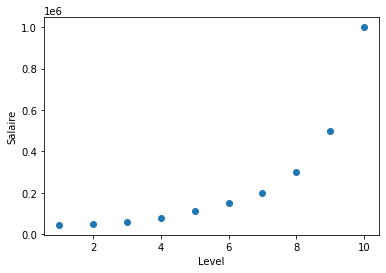

In [29]:
x = np.array(dataframe03['Level'])
x=x.reshape(10,1)

col_un=np.ones(x.shape)


X = np.hstack((x, col_un))
X = np.hstack((x**2,X))
print(X)


y = np.array(dataframe03['Salary'])
y = y.reshape((len(y),1))

print("shape de x: ", x.shape)
print('--------------------------------------------------------------')
print("shape de X: ", X.shape)
print('--------------------------------------------------------------')
print("shape de y: ", y.shape)
print('--------------------------------------------------------------')

plt.scatter(x,y)
plt.xlabel('Level')
plt.ylabel('Salaire')

In [30]:
#Création du theta aléatoire 3 lignes/1 colonne en lien avec le nb de paramètres (ici a,b et c donc 3 paramètres)
theta = np.random.randn(3,1)

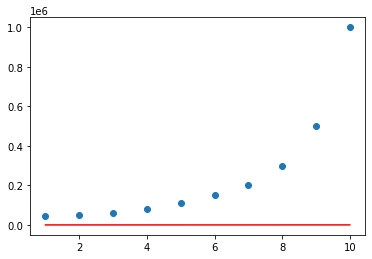

In [31]:
modele(X, theta)

plt.scatter(x,y)
plt.plot(x,modele(X,theta), c='r')


plt.show() 

In [32]:
fonction_cout(X,y,theta)
gradient(X,y,theta)

learning_rate = 0.0001
n_iterations = 1000

descente_gradient(X,y,theta,learning_rate,n_iterations)

(array([[ 8146.79531251],
        [-8616.4646313 ],
        [-1830.04998653]]),
 array([4.29287671e+10, 2.71920739e+10, 1.85042036e+10, 1.37075839e+10,
        1.10591005e+10, 9.59648010e+09, 8.78850679e+09, 8.34192685e+09,
        8.09485172e+09, 7.95791203e+09, 7.88177207e+09, 7.83919644e+09,
        7.81515004e+09, 7.80133284e+09, 7.79316289e+09, 7.78811073e+09,
        7.78478003e+09, 7.78239992e+09, 7.78054487e+09, 7.77897995e+09,
        7.77757549e+09, 7.77625989e+09, 7.77499363e+09, 7.77375489e+09,
        7.77253163e+09, 7.77131720e+09, 7.77010792e+09, 7.76890178e+09,
        7.76769764e+09, 7.76649490e+09, 7.76529322e+09, 7.76409240e+09,
        7.76289234e+09, 7.76169298e+09, 7.76049429e+09, 7.75929625e+09,
        7.75809886e+09, 7.75690210e+09, 7.75570598e+09, 7.75451049e+09,
        7.75331563e+09, 7.75212140e+09, 7.75092780e+09, 7.74973482e+09,
        7.74854248e+09, 7.74735076e+09, 7.74615967e+09, 7.74496921e+09,
        7.74377937e+09, 7.74259016e+09, 7.74140158e+09, 

Entrainement du modèle

[[ 15305.50825859]
 [-81572.22999965]
 [100607.6852364 ]]


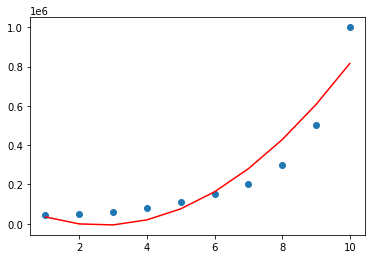

In [33]:
learning_rate = 0.0001
n_iterations = 100000
 
theta_final, cost_history = descente_gradient(X, y, theta, learning_rate, n_iterations)
 
print(theta_final) #parametres du modele une fois que la machine a été entrainée
 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = modele(X, theta_final)
#print(predictions)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(X[:,1], predictions, c='r')
plt.show()

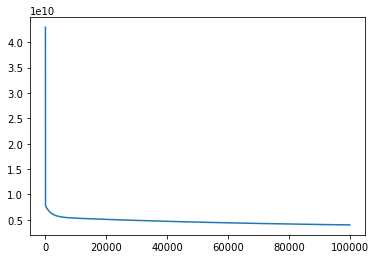

In [34]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [35]:
coef_determination(y, predictions)

0.9006417325021573

Régression polynomiale: data VIN ROUGE

In [36]:
#1-Récupération des données

vin=pd.read_csv("qualite-vin-rouge.csv")

In [37]:
dataframe04= pd.DataFrame(vin)
dataframe04

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [38]:
#Recherche de la corrélation dans la colonne MEDV avec valeur absolue car 1 et -1 sont corrélées
dataframe04.corrwith(dataframe04['qualité'], method='pearson').abs().sort_values(ascending=False)

qualité                      1.000000
alcool                       0.476166
acidité volatile             0.390558
sulphates                    0.251397
acide citrique               0.226373
anhydride sulfureux total    0.185100
densité                      0.174919
chlorures                    0.128907
acidité fixe                 0.124052
pH                           0.057731
dioxyde de soufre libre      0.050656
sucre résiduel               0.013732
dtype: float64

shape de x:  (1599, 2)
--------------------------------------------------------------
shape de X:  (1599, 6)
--------------------------------------------------------------
shape de y:  (1599, 1)
--------------------------------------------------------------


Text(0, 0.5, 'Qualité')

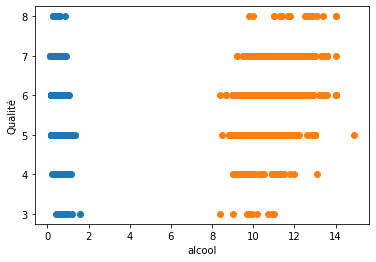

In [39]:
selection_col=dataframe04.iloc[: , [1,10]] #Selection de la colonne 2: 'acid volatile' et 11: 'alcool'

x = np.array(selection_col)

col_un=np.ones(x.shape)

X = np.hstack((x, col_un))
X = np.hstack((x**2,X))



y = np.array(dataframe04['qualité'])
y = y.reshape((len(y),1))

print("shape de x: ", x.shape)
print('--------------------------------------------------------------')
print("shape de X: ", X.shape)
print('--------------------------------------------------------------')
print("shape de y: ", y.shape)
print('--------------------------------------------------------------')

plt.scatter(x[:,0],y)
plt.xlabel('acide volatile')
plt.ylabel('Qualité')

plt.scatter(x[:,1],y)
plt.xlabel('alcool')
plt.ylabel('Qualité')

In [40]:
#Création du theta aléatoire 6 lignes/1 colonne en lien avec le nb de paramètres (ici a,b et c donc 3 paramètres)
theta = np.random.randn(6,1)

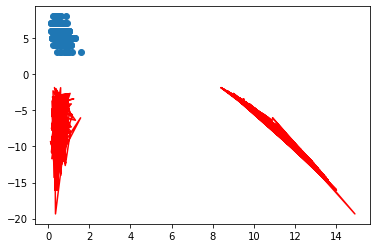

In [41]:
modele(X, theta)

plt.scatter(x[:,0],y)
plt.plot(x,modele(X,theta), c='r')


plt.show() 

Inutile d'aller plus loin, le modèle de régression linéaire n'est pas adapté pour cette étude

# Scikit Learn :

# Régression simple

shape de x:  (27, 1)
--------------------------------------------------------------
shape de y:  (27, 1)
--------------------------------------------------------------


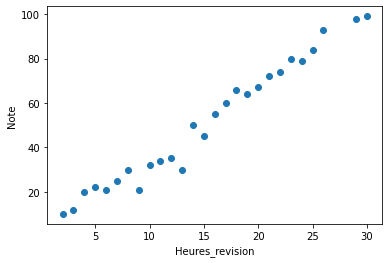

In [42]:
#1-Récupération des données

reg_simple=pd.read_csv("reg_simple.csv")
reg_simple

#2-Visualisation des données

dataframe= pd.DataFrame(reg_simple)

x = np.array(dataframe['heure_rev']) # Variable explicative
x = x.reshape((len(x),1))

y = np.array(dataframe['note'])
y = y.reshape((len(y),1))

x_base=x
y_base=y

print("shape de x: ", x.shape)
print('--------------------------------------------------------------')
print("shape de y: ", y.shape)
print('--------------------------------------------------------------')


plt.scatter(x,y)
plt.xlabel('Heures_revision')
plt.ylabel('Note')

plt.show() 

In [43]:
#Régression linéaire simple
from sklearn.linear_model import LinearRegression

#instancier 
regressor = LinearRegression()

#entrainer
regressor.fit(x, y)

#Coefficient de détermination
coef_determination=regressor.score(x,y)
print("coef_determination:",coef_determination)

#Predictions
predictions=regressor.predict(x)

coef_determination: 0.9733203596683907


<function matplotlib.pyplot.show(close=None, block=None)>

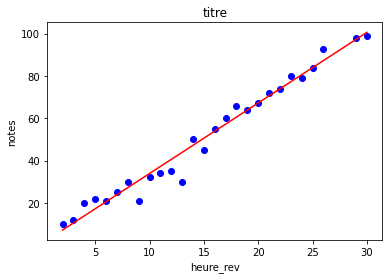

In [44]:
#visuel

plt.scatter(x_base, y_base, color = 'blue')
plt.plot(x,predictions, color = 'red')
#plt.plot(x,regressor.predict(x), color = 'red')

plt.title('titre')
plt.xlabel("heure_rev")
plt.ylabel('notes')
plt.show

Même résultat sans l'utilisation de scikit-learn -> entrée [10]

# Régression polynomiale:

In [45]:
#1-Récupération des données

boston=pd.read_csv("boston_house_prices.csv")
dataframe02= pd.DataFrame(boston)

In [99]:
selection_col=dataframe02.iloc[: , [5,12]] #Selection de la colonne 5: 'RM' et 12: 'LSTA'

X = np.array(selection_col) # Variables explicatives

Y = np.array(dataframe02['MEDV'])
Y = Y.reshape((len(y),1))

print("shape de X: ", X.shape)
print('--------------------------------------------------------------')
print("shape de Y: ", Y.shape)
print('--------------------------------------------------------------')

shape de X:  (506, 2)
--------------------------------------------------------------
shape de Y:  (506, 1)
--------------------------------------------------------------


In [100]:
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

#Fonction pour entrainer et choisir notre modèle en fonction du degré du polynome
 
def evalPolynomialRegression(degree):
    #entrainement du modèle
    polynomial_features= PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    # Evaluation du train set
    y_train_predict = model.predict(X_train_poly)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
 
    print("-------------TRAIN SET - DEGREE: {}----------------".format(degree))
    #print("---------------------------------------------------")
    print('Erreur quadratique moyenne: {}'.format(rmse))
    print('Le score R2 est {}'.format(r2))
    print('\n')
 
    # Evaluation du test set
    y_test_predict = model.predict(X_test_poly)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)
 
    print("-------------TEST SET - DEGREE: {}-----------------".format(degree))
    #print("---------------------------------------------------")
    print('Erreur quadratique moyenne: {}'.format(rmse))
    print('Le score R2 est {}'.format(r2))
    
    return model,r2 ,rmse

In [103]:
#Boucle pour voir plusieurs degrées de polynome en simultané
for i in range(2,20):
    evalPolynomialRegression(i)
    print('--------------------------------------------')
    print('--------------------------------------------\n')

-------------TRAIN SET - DEGREE: 2----------------
Erreur quadratique moyenne: 4.319658995006362
Le score R2 est 0.7808475624020519


-------------TEST SET - DEGREE: 2-----------------
Erreur quadratique moyenne: 5.30518349005234
Le score R2 est 0.6543594328054229
--------------------------------------------
--------------------------------------------

-------------TRAIN SET - DEGREE: 3----------------
Erreur quadratique moyenne: 4.132523928832207
Le score R2 est 0.7994243852918264


-------------TEST SET - DEGREE: 3-----------------
Erreur quadratique moyenne: 5.344826137056418
Le score R2 est 0.6491745787531848
--------------------------------------------
--------------------------------------------

-------------TRAIN SET - DEGREE: 4----------------
Erreur quadratique moyenne: 3.7667630276293567
Le score R2 est 0.8333581893171947


-------------TEST SET - DEGREE: 4-----------------
Erreur quadratique moyenne: 5.830886159402362
Le score R2 est 0.5824648759622555
--------------------